In [1]:
import mne
import scipy.io as sio
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from mne import create_info, EpochsArray

In [2]:
import sys
sys.path.append("../src/data")
from myMNE import makeMNE

## Considerações importantes: é necessário baixar os dados do dropbox e separa o conjunto de dados em pastas 'aud' e 'vis'.

In [4]:
from os import listdir
from os.path import isfile, join
mypath = '../data/raw/aud'

onlyfiles = [mypath+"/"+f for f in listdir(mypath) if isfile(join(mypath, f))]
aud = list(map(makeMNE,onlyfiles))

240 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
0 bad epochs dropped
240 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
0 bad epochs dropped
240 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
0 bad epochs dropped
240 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
0 bad epochs dropped
240 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
0 bad epochs dropped
240 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
0 bad epochs dropped
240 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
0 bad epochs dropped
240 matching events found
A

In [3]:
from os import listdir
from os.path import isfile, join
mypath = '../data/raw/info_aud'

onlyfiles = [mypath+"/"+f for f in listdir(mypath) if isfile(join(mypath, f))]

In [4]:
import scipy.io as sc_io

In [ ]:
## checking if the vector size is variable

import scipy.io as sc_io



## Salvando os objetos em um pickle

### Criando os arquivos:

In [13]:
numeros_arquivos = ['{num:02d}'.format(num=i) for i in range(len(aud))]
for i in numeros_arquivos:
    !touch ../data/interim/aud_{i}

## Salvando com pickle

In [16]:
path = '../data/interim'

files = [path+"/"+f for f in listdir(path) if isfile(join(path, f))]


In [22]:
import pickle 
for ind, a in enumerate(aud):
    with open(files[ind], 'wb') as file:
        pickle.dump(a, file)

### Informação importante:

* Os trial pares são a primeira vez que os indivíduos vêm o estímulo, logo, ímpares correspondem a segunda.

In [4]:
picks = mne.pick_types(aud[0].info, meg=False, eeg=True, stim=False, eog=False)

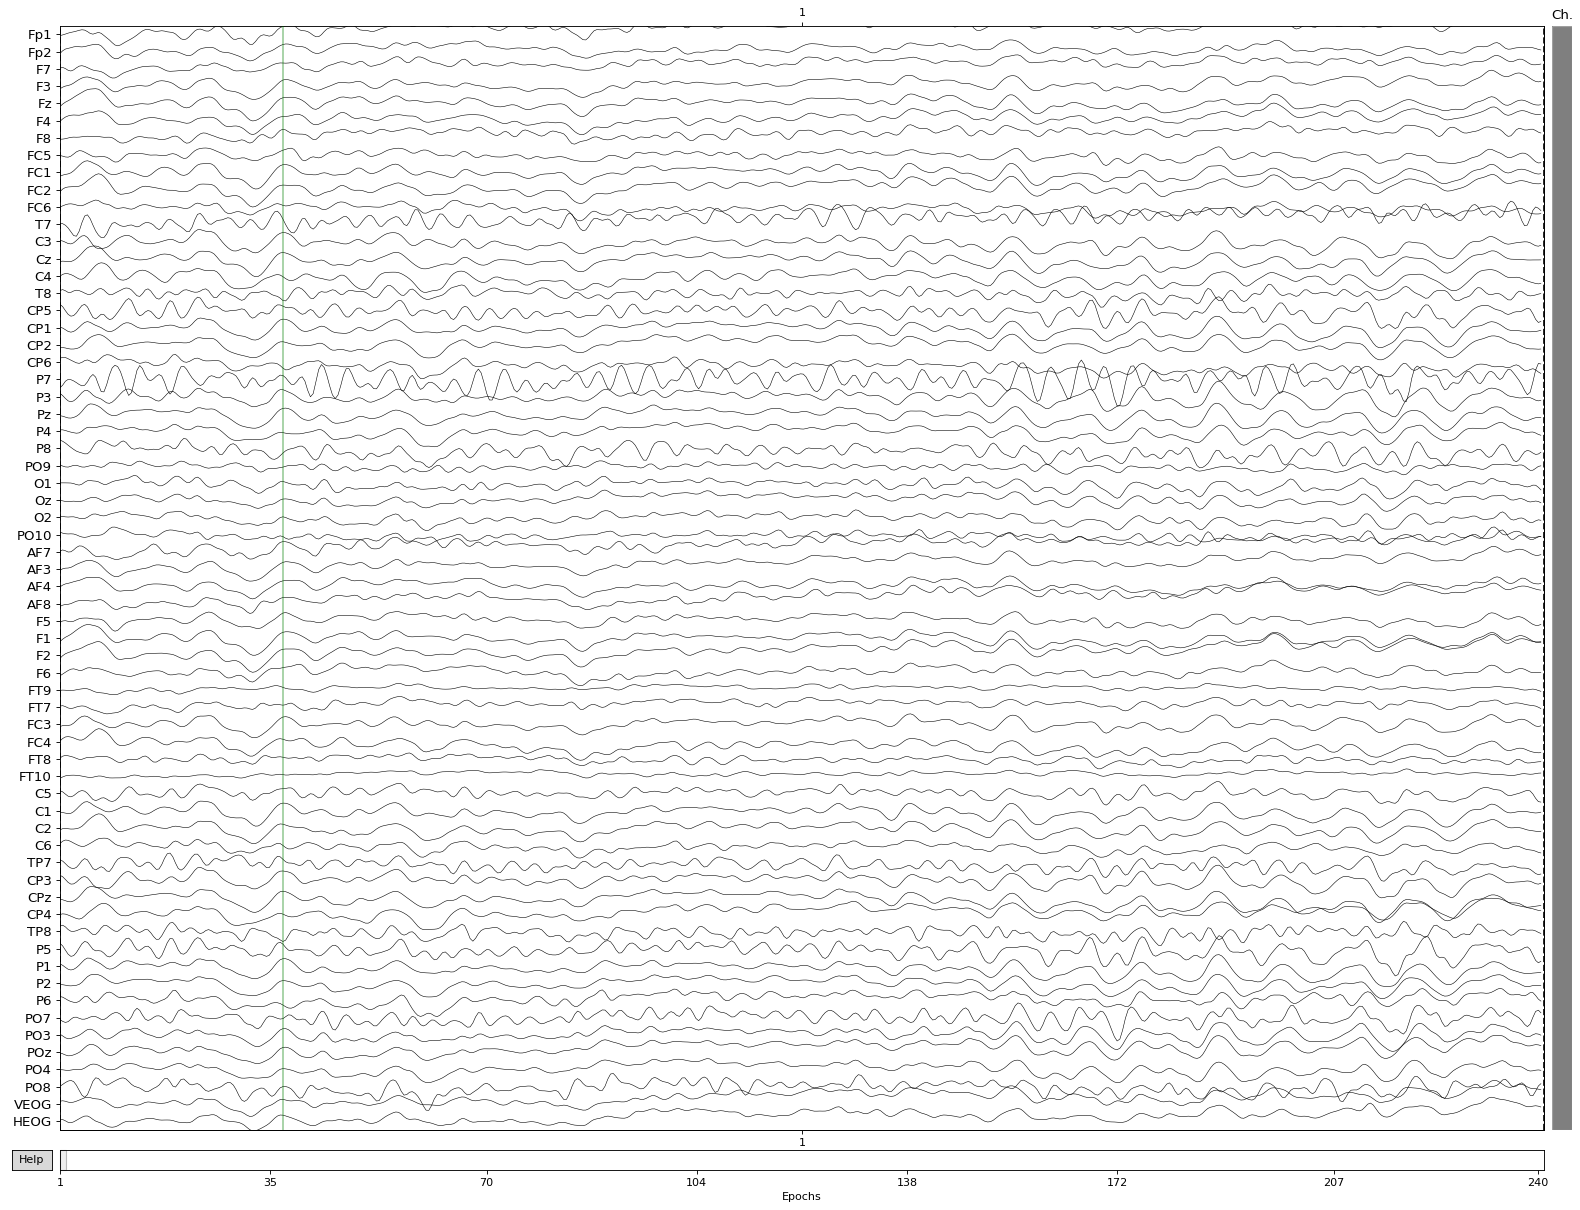

In [12]:

plt.rcParams["figure.figsize"] = [20,15]

axs = aud[0].plot(scalings={"eeg": 1000e-1},
           block=True,
           n_epochs = 1,
           n_channels = 64,
           show =  False
         )

plt.savefig("../reports/figures/channel_by_trial.pdf",bbox_inches='tight', dpi = 300)

    Using multitaper spectrum estimation with 7 DPSS windows


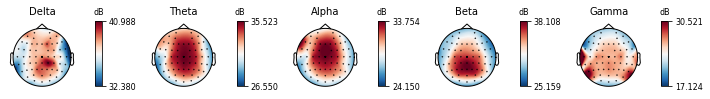

In [28]:
fig = aud[0].plot_psd_topomap()
fig.savefig("../reports/figures/aud_1_by_band.pdf",bbox_inches='tight', dpi = 300)

    Using multitaper spectrum estimation with 7 DPSS windows


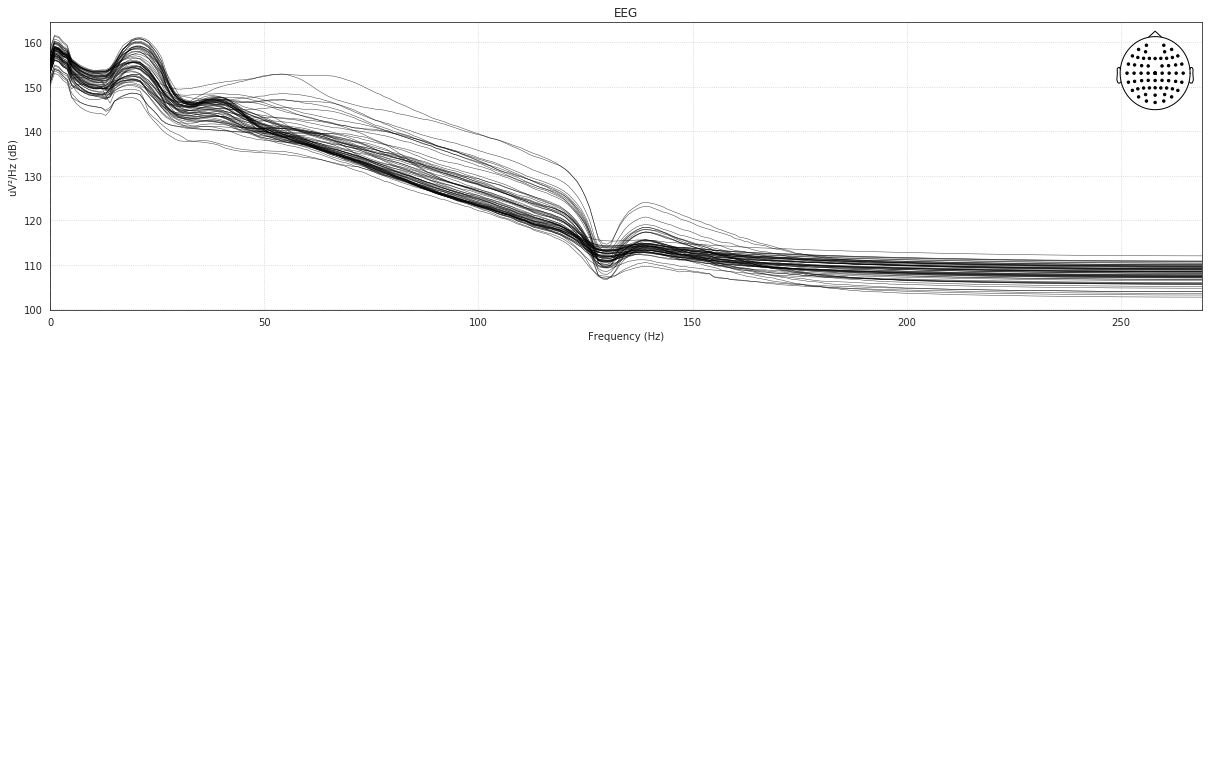

In [8]:
import seaborn as sns
sns.set_style('white')

plt.rcParams["figure.figsize"] = [20,5]

fig = aud[0].plot_psd(tmax=np.inf, fmax=359,average=False,spatial_colors=True)

fig.tight_layout()